In [498]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from IPython.core.debugger import set_trace

In [499]:
from collections import defaultdict
traj_data = json.load(open('./UDysRS_UPDRS_Export/LA_split_all_export.txt'))
traj_data_dict = defaultdict(list)

maxlen = 0
for key, val in traj_data.items():
    body_parts = sorted(val['position'].keys())
    body_parts = list(x for x in body_parts if '_' in x)
    
    
    body_dict = defaultdict(list)
    for b in body_parts:
        pure_name = b.split('_')[0]
        body_dict[pure_name] += val['position'][b]
    
    position_vec = np.array(list(body_dict.values())).flatten()
    if len(position_vec) > maxlen:
        maxlen = len(position_vec)
        
    traj_data_dict['position'].append(  position_vec  )

for i in range(len(traj_data_dict['position'])):
    pos = traj_data_dict['position'][i].tolist()
    traj_data_dict['position'][i] = np.array(pos + [ 0.0 ] * (maxlen-len(traj_data_dict['position'][i])))

traj_df = pd.DataFrame(data=traj_data_dict, index=traj_data.keys())
traj_df.index

score_data = json.load(open('./UDysRS_UPDRS_Export/UPDRS.txt'))['Total']
score_data_dict = {}
score_data_dict['score'] = list(score_data.values())

score_df = pd.DataFrame(data=score_data_dict, index=score_data.keys())
len(score_df)

traj_df = traj_df.loc[score_df.index].dropna()
score_df = score_df.loc[traj_df.index].dropna()

X =np.array(traj_df.position.values.tolist())
y = score_df.score.values

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = RandomForestRegressor(n_jobs=-1)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))
def MSE(y_true, y_pred):
    return np.mean( np.square(y_true-y_pred)  )
def RMSLE(y_true, y_pred):
    return np.mean( np.square(np.log(y_true+1)-np.log(y_pred+1)))

print('MAE : ', MAE(y_test, y_pred))
print('MSE : ', MSE(y_test, y_pred))
print('RMSLE : ', RMSLE(y_test, y_pred))

y_pred

y_test

np.abs(y_pred-y_test).mean()



FileNotFoundError: [Errno 2] No such file or directory: './UDysRS_UPDRS_Export/LA_split_all_export.txt'

In [500]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.ion()
%matplotlib inline

In [501]:
file = './preprocess/data/targets_dataframe.pkl'

In [502]:
df = pd.read_pickle(file).iloc[:,:-2]
df.head()

,Velocity,Cadence,Functional Amb. Profile,Cycle Time(sec)/L,Cycle Time(sec)/R,Stride Length(cm)/L,Stride Length(cm)/R,HH Base Support(cm)/L,HH Base Support(cm)/R,Swing Time(sec)/L,Swing Time(sec)/R,Stance Time(sec)/L,Stance Time(sec)/R,Double Supp. Time(sec)/L,Double Supp. Time(sec)/R,Toe In / Out/L,Toe In / Out/R
314465_0_0,113.2,105.6,99.0,1.125,1.136,130.733,128.717,14.957,14.512,0.425,0.433,0.700,0.703,0.275,0.263,3.0,4.0
314465_0_1,117.6,109.8,91.0,1.094,1.092,128.690,128.976,14.705,14.265,0.413,0.417,0.681,0.676,0.259,0.268,2.0,4.3
314465_0_2,111.3,106.9,91.0,1.128,1.128,128.347,127.350,15.578,14.338,0.425,0.436,0.703,0.692,0.267,0.278,-2.1,1.0
314465_0_3,115.9,108.1,97.0,1.111,1.100,128.682,130.209,14.735,14.582,0.416,0.425,0.695,0.675,0.263,0.273,1.0,3.7
379233_0_0,42.3,87.8,57.0,1.366,1.386,57.793,59.209,10.133,10.413,0.407,0.391,0.959,0.995,0.587,0.605,16.1,12.5


In [503]:
import seaborn as sns

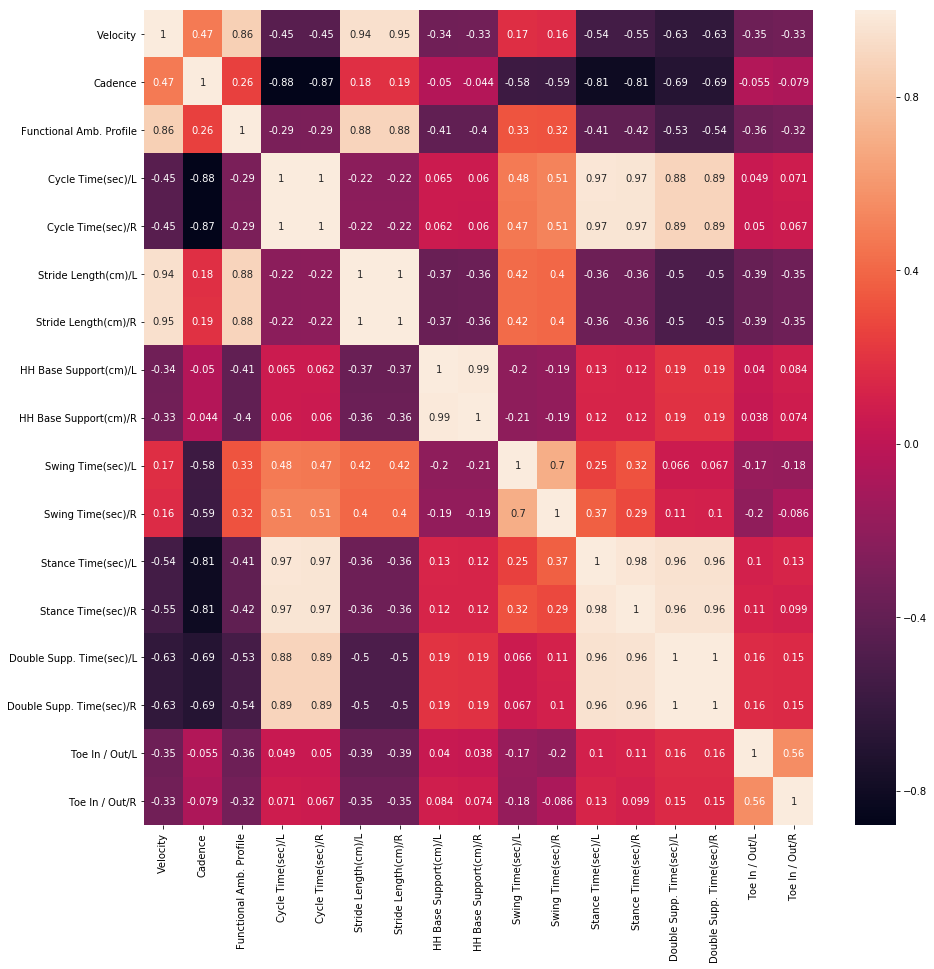

In [504]:
fig, ax = plt.subplots(1, figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax, annot=True)

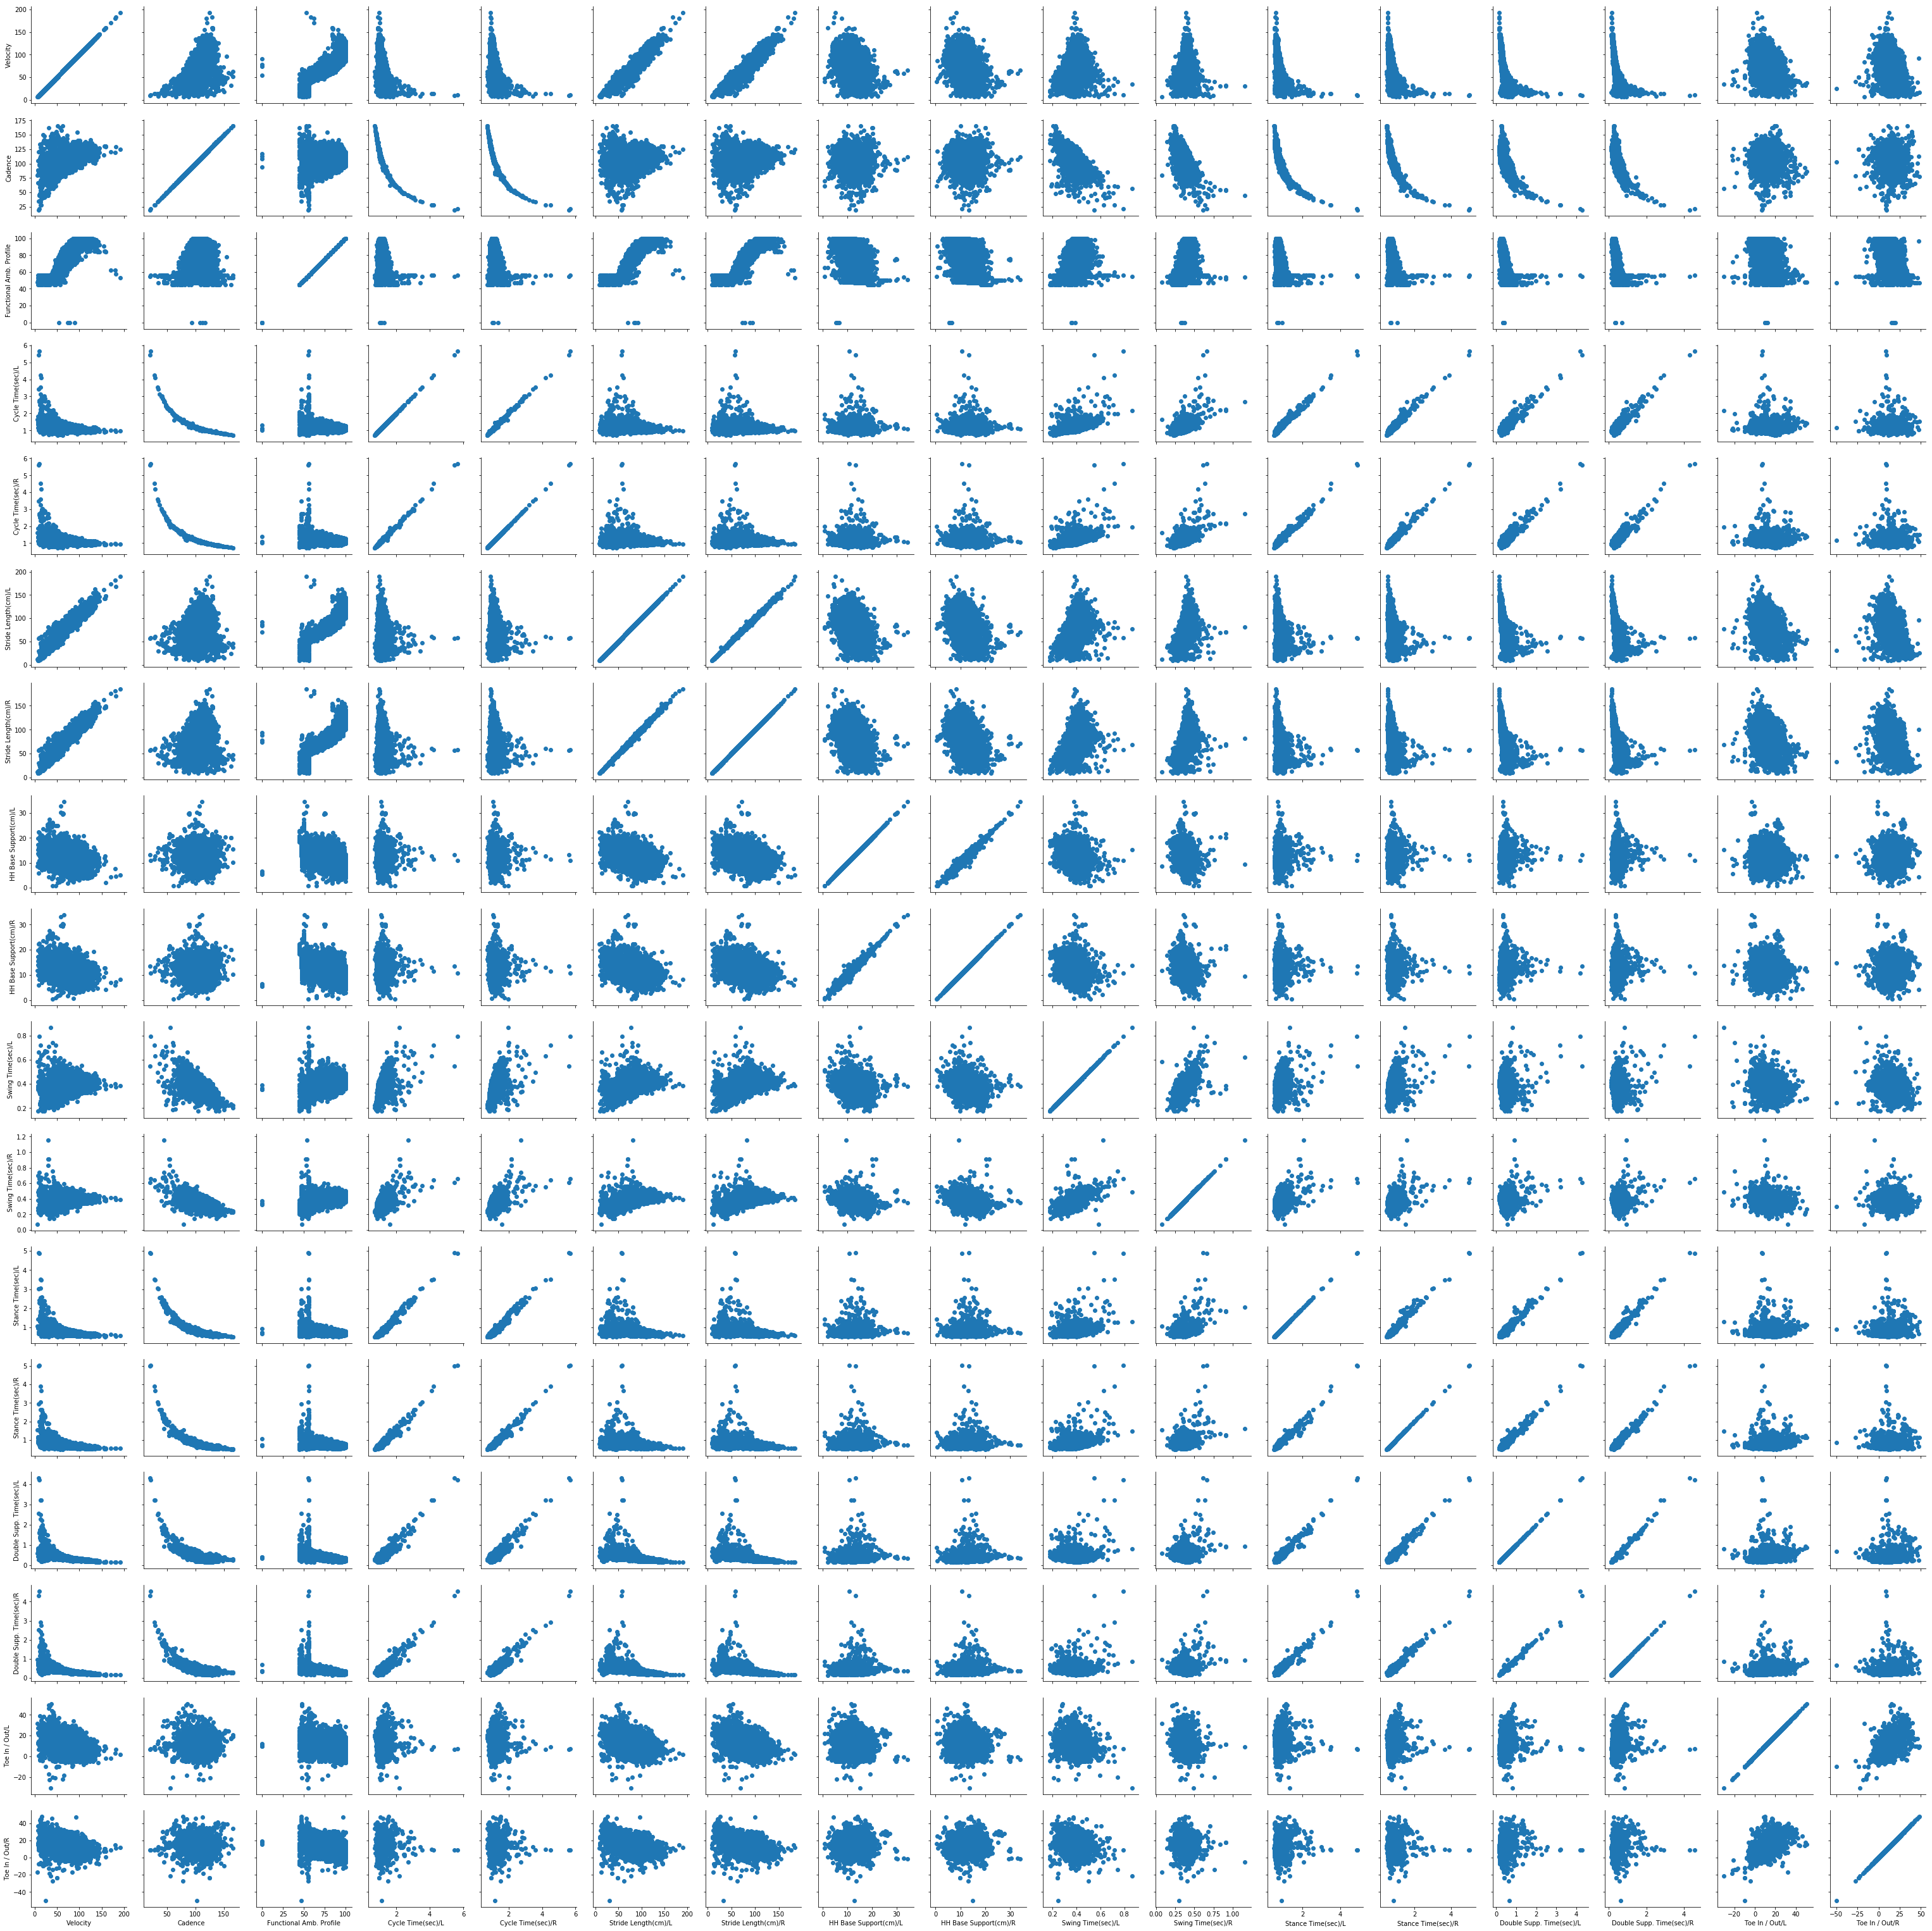

In [26]:
g = sns.PairGrid(df)
g.map(plt.scatter)

In [18]:
plt.show()

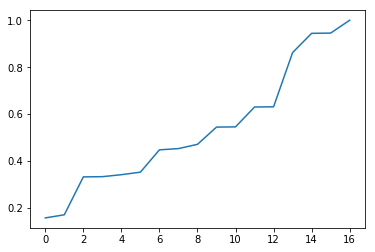

In [29]:
plt.plot(sorted(np.abs(corr["Velocity"].values)))

In [505]:
corr.columns

Index(['Velocity', 'Cadence', 'Functional Amb. Profile', 'Cycle Time(sec)/L',
       'Cycle Time(sec)/R', 'Stride Length(cm)/L', 'Stride Length(cm)/R',
       'HH Base Support(cm)/L', 'HH Base Support(cm)/R', 'Swing Time(sec)/L',
       'Swing Time(sec)/R', 'Stance Time(sec)/L', 'Stance Time(sec)/R',
       'Double Supp. Time(sec)/L', 'Double Supp. Time(sec)/R',
       'Toe In / Out/L', 'Toe In / Out/R'],
      dtype='object')

In [506]:
import matplotlib.ticker as plticker

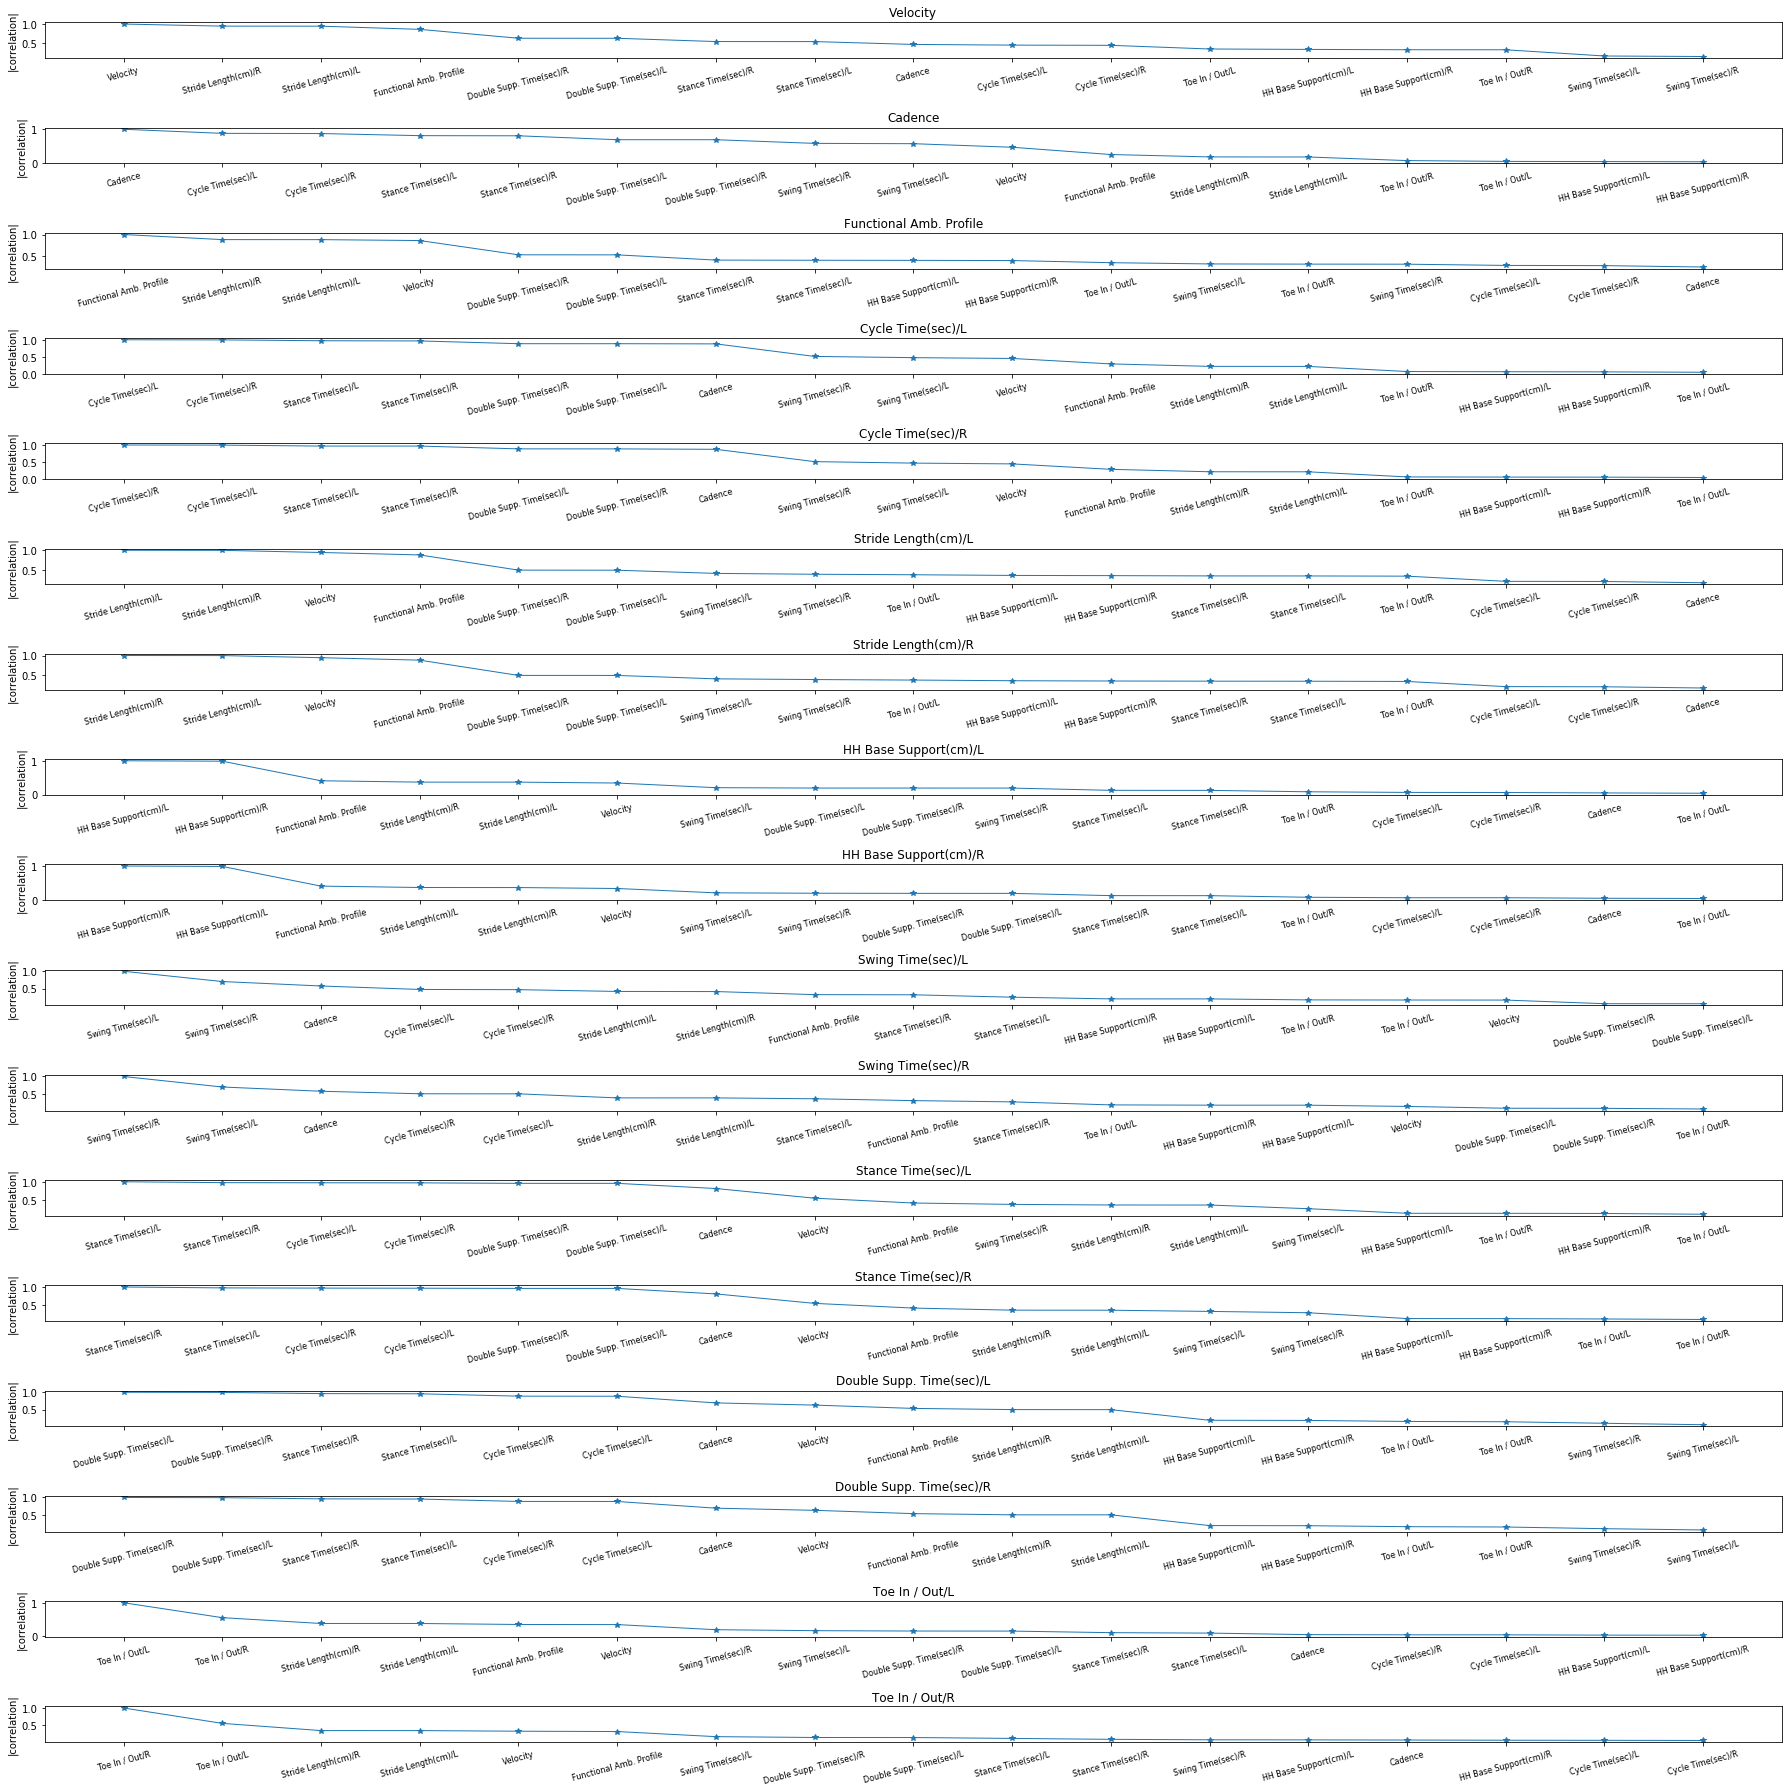

In [507]:
fig, axes = plt.subplots(len(corr.columns), figsize=(25,25))

step = 1
for ax,col in zip(axes,corr.columns):
    values = np.abs(corr[col].values)
    ixs = np.argsort(-values)
    
    names = corr.columns[ixs].values
    values = values[ixs]
    ax.plot(np.arange(step*len(ixs), step=step), values, '*-', linewidth=1)
    loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    xticks = list(ax.get_xticks())
    for i in range(len(names)):
        xticks[i] = names[i]
        
    xticks = [''] + xticks
    ax.set_xticklabels(xticks,fontsize=8, rotation=15)

    ax.set_title(col)
    ax.set_ylabel('|correlation|')

plt.tight_layout()


In [508]:
df_trans = df.T
df_summary = df_trans.iloc[:3]
df_pair = df_trans.iloc[3:]

columns = [ s.split('/')[0] for s in df_pair.index.values ]

new_colums = []
for col in columns:
    if col not in new_colums:
        new_colums.append(col.strip())

avged_data = {}
odds, evens = np.arange(start=1, stop=len(df_pair),step=2), np.arange(start=0, stop=len(df_pair),step=2)
for ix, (odd, even) in enumerate(zip(odds, evens)):
    avged = np.mean([df_pair.iloc[odd], df_pair.iloc[even]], axis=0).T
    name=df_pair.iloc[2*ix].name.split('/')[0].strip()
    avged_data[name] = avged
    
df_pair_avg = pd.DataFrame(avged_data, index=df_pair.columns).T

In [509]:
df_summary.head()

,314465_0_0,314465_0_1,314465_0_2,314465_0_3,379233_0_0,379233_0_1,379233_0_2,379233_0_3,379233_1_0,379233_1_1,...,20000931_0_0,20000931_0_1,20000931_0_2,20000931_0_3,am022_0_0,am022_0_1,am022_1_0,am022_1_1,am022_2_0,am022_2_1
Velocity,113.2,117.6,111.3,115.9,42.3,49.8,52.3,42.9,39.9,46.9,...,62.5,63.1,59.8,60.3,73.9,74.6,23.5,21.4,100.9,111.6
Cadence,105.6,109.8,106.9,108.1,87.8,92.8,101.4,83.6,61.5,70.0,...,85.5,88.0,85.7,81.9,100.8,105.6,42.2,40.9,108.4,115.4
Functional Amb. Profile,99.0,91.0,91.0,97.0,57.0,71.0,68.0,58.0,55.0,65.0,...,79.0,80.0,75.0,77.0,84.0,83.0,56.0,56.0,96.0,97.0


In [510]:
df_pair_avg.head()

,314465_0_0,314465_0_1,314465_0_2,314465_0_3,379233_0_0,379233_0_1,379233_0_2,379233_0_3,379233_1_0,379233_1_1,...,20000931_0_0,20000931_0_1,20000931_0_2,20000931_0_3,am022_0_0,am022_0_1,am022_1_0,am022_1_1,am022_2_0,am022_2_1
Cycle Time(sec),1.1305,1.0930,1.1280,1.1055,1.376,1.2945,1.1855,1.403,1.956,1.6970,...,1.4180,1.3480,1.3990,1.4595,1.1900,1.1250,2.8750,2.9860,1.1000,1.032
Stride Length(cm),129.7250,128.8330,127.8485,129.4455,58.501,65.1825,62.7995,62.210,77.903,80.7920,...,89.4110,85.9465,86.1105,89.7140,89.0015,85.2435,67.2115,63.0435,112.6460,116.418
HH Base Support(cm),14.7345,14.4850,14.9580,14.6585,10.273,10.0580,10.7225,7.418,0.591,0.7795,...,9.7840,12.6190,11.8765,9.7405,1.8260,4.3605,9.3240,7.7210,5.1605,6.328
Swing Time(sec),0.4290,0.4150,0.4305,0.4205,0.399,0.4005,0.3740,0.427,0.537,0.4975,...,0.5095,0.4635,0.4940,0.5160,0.4285,0.4070,0.6690,0.6090,0.4065,0.387
Stance Time(sec),0.7015,0.6785,0.6975,0.6850,0.977,0.8935,0.8120,0.976,1.419,1.1990,...,0.9090,0.8850,0.9055,0.9435,0.7615,0.7170,2.2060,2.3770,0.6940,0.645


In [511]:
df_trans = pd.concat([df_summary, df_pair_avg])
df_trans

,314465_0_0,314465_0_1,314465_0_2,314465_0_3,379233_0_0,379233_0_1,379233_0_2,379233_0_3,379233_1_0,379233_1_1,...,20000931_0_0,20000931_0_1,20000931_0_2,20000931_0_3,am022_0_0,am022_0_1,am022_1_0,am022_1_1,am022_2_0,am022_2_1
Velocity,113.2000,117.6000,111.3000,115.9000,42.300,49.8000,52.3000,42.900,39.9000,46.9000,...,62.5000,63.1000,59.8000,60.3000,73.9000,74.6000,23.5000,21.4000,100.9000,111.6000
Cadence,105.6000,109.8000,106.9000,108.1000,87.800,92.8000,101.4000,83.600,61.5000,70.0000,...,85.5000,88.0000,85.7000,81.9000,100.8000,105.6000,42.2000,40.9000,108.4000,115.4000
Functional Amb. Profile,99.0000,91.0000,91.0000,97.0000,57.000,71.0000,68.0000,58.000,55.0000,65.0000,...,79.0000,80.0000,75.0000,77.0000,84.0000,83.0000,56.0000,56.0000,96.0000,97.0000
Cycle Time(sec),1.1305,1.0930,1.1280,1.1055,1.376,1.2945,1.1855,1.403,1.9560,1.6970,...,1.4180,1.3480,1.3990,1.4595,1.1900,1.1250,2.8750,2.9860,1.1000,1.0320
Stride Length(cm),129.7250,128.8330,127.8485,129.4455,58.501,65.1825,62.7995,62.210,77.9030,80.7920,...,89.4110,85.9465,86.1105,89.7140,89.0015,85.2435,67.2115,63.0435,112.6460,116.4180
HH Base Support(cm),14.7345,14.4850,14.9580,14.6585,10.273,10.0580,10.7225,7.418,0.5910,0.7795,...,9.7840,12.6190,11.8765,9.7405,1.8260,4.3605,9.3240,7.7210,5.1605,6.3280
Swing Time(sec),0.4290,0.4150,0.4305,0.4205,0.399,0.4005,0.3740,0.427,0.5370,0.4975,...,0.5095,0.4635,0.4940,0.5160,0.4285,0.4070,0.6690,0.6090,0.4065,0.3870
Stance Time(sec),0.7015,0.6785,0.6975,0.6850,0.977,0.8935,0.8120,0.976,1.4190,1.1990,...,0.9090,0.8850,0.9055,0.9435,0.7615,0.7170,2.2060,2.3770,0.6940,0.6450
Double Supp. Time(sec),0.2690,0.2635,0.2725,0.2680,0.596,0.4920,0.4485,0.603,0.8545,0.6570,...,0.4060,0.4320,0.4525,0.4390,0.3415,0.3160,1.6140,1.7395,0.2945,0.2605
Toe In,3.5000,3.1500,-0.5500,2.3500,14.300,18.6000,17.8500,21.000,19.0000,11.9000,...,15.0500,16.9500,16.0000,16.3500,22.6500,24.1500,20.6000,20.3500,15.6500,16.8500


In [512]:
df_trans.T.corr()

,Velocity,Cadence,Functional Amb. Profile,Cycle Time(sec),Stride Length(cm),HH Base Support(cm),Swing Time(sec),Stance Time(sec),Double Supp. Time(sec),Toe In
Velocity,1.000000,0.471329,0.862137,-0.450914,0.945154,-0.338890,0.178016,-0.548663,-0.631575,-0.388193
Cadence,0.471329,1.000000,0.257064,-0.877812,0.185838,-0.047330,-0.628966,-0.815289,-0.693657,-0.076119
Functional Amb. Profile,0.862137,0.257064,1.000000,-0.291415,0.883691,-0.407948,0.351385,-0.415853,-0.536173,-0.384312
Cycle Time(sec),-0.450914,-0.877812,-0.291415,1.000000,-0.219136,0.062061,0.535382,0.975739,0.887737,0.067112
Stride Length(cm),0.945154,0.185838,0.883691,-0.219136,1.000000,-0.366938,0.441678,-0.358686,-0.501656,-0.416755
HH Base Support(cm),-0.338890,-0.047330,-0.407948,0.062061,-0.366938,1.000000,-0.216038,0.125131,0.192352,0.067220
Swing Time(sec),0.178016,-0.628966,0.351385,0.535382,0.441678,-0.216038,1.000000,0.337481,0.093852,-0.194168
Stance Time(sec),-0.548663,-0.815289,-0.415853,0.975739,-0.358686,0.125131,0.337481,1.000000,0.965072,0.125114
Double Supp. Time(sec),-0.631575,-0.693657,-0.536173,0.887737,-0.501656,0.192352,0.093852,0.965072,1.000000,0.177234
Toe In,-0.388193,-0.076119,-0.384312,0.067112,-0.416755,0.067220,-0.194168,0.125114,0.177234,1.000000


In [514]:
measurements = df_trans.values
measurements.shape

(10, 3744)

In [532]:
C = np.cov(df_trans.values)
C.shape

(10, 10)

Initial ordering: ['Velocity', 'Cadence', 'Functional Amb. Profile', 'Cycle Time(sec)', 'Stride Length(cm)', 'HH Base Support(cm)', 'Swing Time(sec)', 'Stance Time(sec)', 'Double Supp. Time(sec)', 'Toe In']
Initial covariance matrix score: 24.206628633020554
Best ordering: ['Functional Amb. Profile', 'Stride Length(cm)', 'Velocity', 'Toe In', 'Cadence', 'HH Base Support(cm)', 'Cycle Time(sec)', 'Stance Time(sec)', 'Double Supp. Time(sec)', 'Swing Time(sec)']
Best score: 46.051880898176066

Cluster     [variables assigned to this cluster]
------------------------------------------------
Cluster 01  ['Functional Amb. Profile', 'Stride Length(cm)', 'Velocity']
Cluster 02  ['Toe In', 'Cadence', 'HH Base Support(cm)']
Cluster 03  ['Cycle Time(sec)', 'Stance Time(sec)', 'Double Supp. Time(sec)']
Cluster 04  ['Swing Time(sec)']


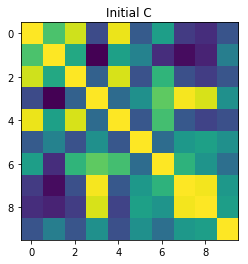

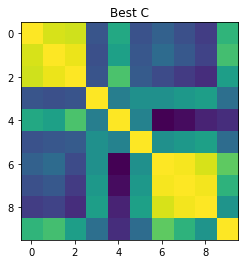

In [560]:
import numpy as np
from matplotlib import pyplot as plt
import math

n_clusters = 3

# (n_variables x n_sample)
measurements = df_trans.values

# This generates 100 variables that could possibly be assigned to 5 clusters
n_variables, n_samples = measurements.shape


# To keep this example simple, each cluster will have a fixed size
cluster_size = n_variables // n_clusters

C = df_trans.T.corr().values

def score(C):
    '''
    Function to assign a score to an ordered covariance matrix.
    High correlations within a cluster improve the score.
    High correlations between clusters decease the score.
    '''
    score = 0
    for cluster in range(n_clusters):
        inside_cluster = np.arange(cluster_size) + cluster * cluster_size
        outside_cluster = np.setdiff1d(range(n_variables), inside_cluster)

        # Belonging to the same cluster
        score += np.sum(C[inside_cluster, :][:, inside_cluster])

        # Belonging to different clusters
        score -= np.sum(C[inside_cluster, :][:, outside_cluster])
        score -= np.sum(C[outside_cluster, :][:, inside_cluster])

    return score


initial_C = C
initial_score = score(C)
initial_ordering = np.arange(n_variables)

plt.figure()
plt.imshow(C, interpolation='nearest')
plt.title('Initial C')
print('Initial ordering:', [df_trans.index.values[i] for i in initial_ordering])
print('Initial covariance matrix score:', initial_score)

# Pretty dumb greedy optimization algorithm that continuously
# swaps rows to improve the score
def swap_rows(C, var1, var2):
    '''
    Function to swap two rows in a covariance matrix,
    updating the appropriate columns as well.
    '''
    D = C.copy()
    D[var2, :] = C[var1, :]
    D[var1, :] = C[var2, :]

    E = D.copy()
    E[:, var2] = D[:, var1]
    E[:, var1] = D[:, var2]

    return E

current_C = C
current_ordering = initial_ordering
current_score = initial_score

max_iter = 1000
for i in range(max_iter):
    # Find the best row swap to make
    best_C = current_C
    best_ordering = current_ordering
    best_score = current_score
    for row1 in range(n_variables):
        for row2 in range(n_variables):
            if row1 == row2:
                continue
            option_ordering = best_ordering.copy()
            option_ordering[row1] = best_ordering[row2]
            option_ordering[row2] = best_ordering[row1]
            option_C = swap_rows(best_C, row1, row2)
            option_score = score(option_C)

            if option_score > best_score:
                best_C = option_C
                best_ordering = option_ordering
                best_score = option_score

    if best_score > current_score:
        # Perform the best row swap
        current_C = best_C
        current_ordering = best_ordering
        current_score = best_score
    else:
        # No row swap found that improves the solution, we're done
        break
        
# Output the result
plt.figure()
plt.imshow(current_C, interpolation='nearest')
plt.title('Best C')
print('Best ordering:', [df_trans.index.values[i] for i in current_ordering])
print('Best score:', current_score)
print()
print('Cluster     [variables assigned to this cluster]')
print('------------------------------------------------')

import copy
current_ordering = current_ordering.tolist()
tmp = copy.copy(current_ordering)

cluster = 0
while 1:
    start, end = cluster*cluster_size, (cluster+1)*cluster_size
    print('Cluster %02d  %s' % (cluster + 1, [ df_trans.index.values[i] for i in current_ordering[start:end]]))
    for e in current_ordering[start:end]:
        tmp.pop(tmp.index(e))
        
    cluster += 1
    if not tmp:
        break

Initial ordering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Initial covariance matrix score: -2524.6471891743754
Best ordering: [49 27 11 66  5 84 86 41 39 98 44 28 19 74 32 34 77 17  3 12 73 54 91 72
 21 56 23 64  0 75 69 57 59 99 58 33 78 71 97  6 30 94 92 45 55 40 38 83
 70 26  8 87 88 29 67 20  4 25 62  1 90 10 52 35 96 50  9 18 68 51 65 46
 63 22 36 15 76 24 16 79 47 13 37 48 60 14 43 82 53 89 42  2  7 93 85 31
 95 61 81 80]
Best score: 2105.3252614077833

Cluster     [variables assigned to this cluster]
------------------------------------------------
Cluster 01  [49 27 11 66  5 84 86 41 39 98 44 28 19 74 32 34 77 17  3 12]
Cluster 02  [73 54 91 72 21 56 23 64  0 75 69 57 59 99 58 33 78 71 97  6]
Cluster 03  [30 94 92 45

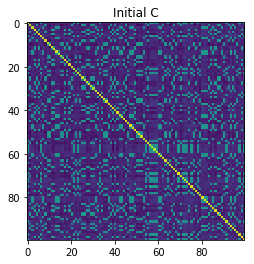

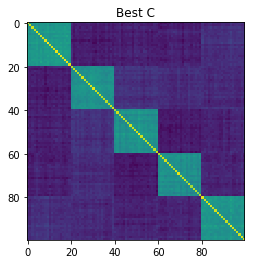

In [535]:
import numpy as np
from matplotlib import pyplot as plt

# This generates 100 variables that could possibly be assigned to 5 clusters
n_variables = 100
n_clusters = 5
n_samples = 1000

# To keep this example simple, each cluster will have a fixed size
cluster_size = n_variables // n_clusters

# Assign each variable to a cluster
belongs_to_cluster = np.repeat(range(n_clusters), cluster_size)
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(
        np.random.randn(n_samples) + latent[belongs_to_cluster[i], :]
    )

variables = np.array(variables)

C = np.cov(variables)

def score(C):
    '''
    Function to assign a score to an ordered covariance matrix.
    High correlations within a cluster improve the score.
    High correlations between clusters decease the score.
    '''
    score = 0
    for cluster in range(n_clusters):
        inside_cluster = np.arange(cluster_size) + cluster * cluster_size
        outside_cluster = np.setdiff1d(range(n_variables), inside_cluster)

        # Belonging to the same cluster
        score += np.sum(C[inside_cluster, :][:, inside_cluster])

        # Belonging to different clusters
        score -= np.sum(C[inside_cluster, :][:, outside_cluster])
        score -= np.sum(C[outside_cluster, :][:, inside_cluster])

    return score


initial_C = C
initial_score = score(C)
initial_ordering = np.arange(n_variables)

plt.figure()
plt.imshow(C, interpolation='nearest')
plt.title('Initial C')
print('Initial ordering:', initial_ordering)
print('Initial covariance matrix score:', initial_score)

# Pretty dumb greedy optimization algorithm that continuously
# swaps rows to improve the score
def swap_rows(C, var1, var2):
    '''
    Function to swap two rows in a covariance matrix,
    updating the appropriate columns as well.
    '''
    D = C.copy()
    D[var2, :] = C[var1, :]
    D[var1, :] = C[var2, :]

    E = D.copy()
    E[:, var2] = D[:, var1]
    E[:, var1] = D[:, var2]

    return E

current_C = C
current_ordering = initial_ordering
current_score = initial_score

max_iter = 1000
for i in range(max_iter):
    # Find the best row swap to make
    best_C = current_C
    best_ordering = current_ordering
    best_score = current_score
    for row1 in range(n_variables):
        for row2 in range(n_variables):
            if row1 == row2:
                continue
            option_ordering = best_ordering.copy()
            option_ordering[row1] = best_ordering[row2]
            option_ordering[row2] = best_ordering[row1]
            option_C = swap_rows(best_C, row1, row2)
            option_score = score(option_C)

            if option_score > best_score:
                best_C = option_C
                best_ordering = option_ordering
                best_score = option_score

    if best_score > current_score:
        # Perform the best row swap
        current_C = best_C
        current_ordering = best_ordering
        current_score = best_score
    else:
        # No row swap found that improves the solution, we're done
        break

# Output the result
plt.figure()
plt.imshow(current_C, interpolation='nearest')
plt.title('Best C')
print('Best ordering:', current_ordering)
print('Best score:', current_score)
print()
print('Cluster     [variables assigned to this cluster]')
print('------------------------------------------------')
for cluster in range(n_clusters):
    print('Cluster %02d  %s' % (cluster + 1, current_ordering[cluster*cluster_size:(cluster+1)*cluster_size]))

In [358]:
a = A()
a.fuck()

100
